In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from matplotlib import pyplot as plt
from collections import Counter  # conta e agrupa itens em uma coleção
from sklearn.cross_validation import train_test_split
from sklearn.metrics.pairwise import euclidean_distances
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.cross_validation import StratifiedKFold
#from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster


C:\Users\Duda\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [25]:
df = pd.read_csv('adult.csv', nrows=None, header=0, index_col=None) # leitura do dataset

# Não considerar a classe do conjunto de dados 
# Somente um conjunto de dados 
X = df[df.columns[:-1]]
Y = df[df.columns[-1]]
# print Y.head()

# remover colunas nao significativas -  fnlwgt: continuous
X =X.drop(columns=['C'])

# ajuste na coluna native-country
pd.get_dummies(X['N']) 

# convertendo as colunas do tipo texto
X['B'] = X['B'].astype('category')
X['D'] = X['D'].astype('category')
X['F'] = X['F'].astype('category')
X['G'] = X['G'].astype('category')
X['H'] = X['H'].astype('category')
X['I'] = X['I'].astype('category')
X['J'] = X['J'].astype('category')
X['N'] = X['N'].astype('category')

categories = X.select_dtypes(['category']).columns
X[categories] = X[categories].apply(lambda x: x.cat.codes)
# print df[categories]
# print X.head(5)

# diminuindo a quantidade de instancias
# porque com 32.500 linhas, silhouette trava e nao calcula em coreI5 12 Gb RAM
X1 = X.head(1000)
print X1.head(1000)

n_instances, n_attributes = X1.shape
print X1.shape

# num_clusters = [11,13,15,17,19]
num_clusters = [2,3,4,5,6,7,8,9]

print("Agrupando com KMeans")

for k in num_clusters:

    cl = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=100)
    
    # cl = cl.fit(X1)
    # fonte: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
    cl_labels = cl.fit_predict(X1)
    
    # cl_labels = cl.labels_
    centroids = cl.cluster_centers_
    
    
        
    # Medir a qualidade dos grupos com a silhueta
    sl_avg = silhouette_score(X1, cl_labels)
    print("KMeans n_clusters =", k, "The average silhouette_score is :", sl_avg)
    #print centroids
    # o melhor numero de grupos é o que tem a silhueta mais proximo de 1: 2 grupos




      A  B   D   E  F   G  H  I  J      K     L   M   N
0    39  7   9  13  4   1  1  4  1   2174     0  40  39
1    50  6   9  13  2   4  0  4  1      0     0  13  39
2    38  4  11   9  0   6  1  4  1      0     0  40  39
3    53  4   1   7  2   6  0  2  1      0     0  40  39
4    28  4   9  13  2  10  5  2  0      0     0  40   5
5    37  4  12  14  2   4  5  4  0      0     0  40  39
6    49  4   6   5  3   8  1  2  0      0     0  16  23
7    52  6  11   9  2   4  0  4  1      0     0  45  39
8    31  4  12  14  4  10  1  4  0  14084     0  50  39
9    42  4   9  13  2   4  0  4  1   5178     0  40  39
10   37  4  15  10  2   4  0  2  1      0     0  80  39
11   30  7   9  13  2  10  0  1  1      0     0  40  19
12   23  4   9  13  4   1  3  4  0      0     0  30  39
13   32  4   7  12  4  12  1  2  1      0     0  50  39
14   40  4   8  11  2   3  0  1  1      0     0  40   0
15   34  4   5   4  2  14  0  0  1      0     0  45  26
16   25  6  11   9  4   5  3  4  1      0     0 

In [29]:
#Para processar o dataset renomeamos as colunas e salvamos como csv
#Utilizamos o algoritmo Kmeans+Silhueta para medir a qualidade dos grupos e em poucos ou grandes grupos houve pouca diferença.

Agrupando com Single Linkage e Dendograma


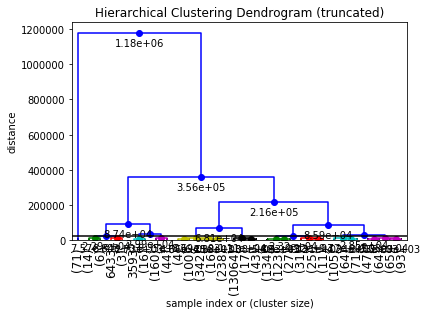

In [22]:
# Hierarquical algoritms
print("Agrupando com Single Linkage e Dendograma")

def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram (truncated)')
        plt.xlabel('sample index or (cluster size)')
        plt.ylabel('distance')
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

# generate the linkage matrix
Z = linkage(X1, 'ward')

for k in num_clusters:

    cl = fcluster(Z, k, criterion='maxclust')

max_d = 20000 # max_d as in max_distance

fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
    annotate_above=10,
    max_d=max_d,  # plot a horizontal cut-off line
)
plt.show()
